In [1]:
from IPython.display import display, HTML

display(HTML(data="""<style>
    div#notebook-container    { width: 100%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }</style>"""))

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


series-1
0 0 0 0
8.987770538003367 inf
0 0 0 1
9.037311877836547 8.987770538003367
0 0 0 2
8.913421101672155 8.987770538003367
0 0 1 0
8.960602283836991 8.913421101672155
0 0 1 1
8.943147883544981 8.913421101672155
0 0 1 2
8.990989352506405 8.913421101672155
0 0 2 0
8.942857928275327 8.913421101672155
0 0 2 1
8.975978543402135 8.913421101672155
0 0 2 2
10.774306729085241 8.913421101672155
0 1 0 0
8.691484144855663 8.913421101672155
0 1 0 1
9.099589166754736 8.691484144855663
0 1 0 2
9.077950010678682 8.691484144855663
0 1 1 0
8.928303746782339 8.691484144855663
0 1 1 1
9.025686641277362 8.691484144855663
0 1 1 2
9.008972313279326 8.691484144855663
0 1 2 0
8.960742286824802 8.691484144855663
0 1 2 1
11.928586656497192 8.691484144855663
0 1 2 2
10.317532635066623 8.691484144855663
0 2 0 0
8.494936994319998 8.691484144855663
0 2 0 1
9.14712762278524 8.494936994319998
0 2 0 2
9.1525287780875 8.494936994319998
0 2 1 0
8.85723843794463 8.494936994319998
0 2 1 1
9.153603628148282 8.4949369943

4 1 0 1
8.679357802028704 8.39869416369242
4 1 0 2
19.819989532000413 8.39869416369242
4 1 1 0
8.53515855743861 8.39869416369242
4 1 1 1
19.92011905904738 8.39869416369242
4 1 1 2
17.354079108942894 8.39869416369242
4 1 2 0
9.48343950664767 8.39869416369242
4 1 2 1
18.396419340293047 8.39869416369242
4 1 2 2
17.805253787340515 8.39869416369242
4 2 0 0
8.754861051228655 8.39869416369242
4 2 0 1
17.172925017820592 8.39869416369242
4 2 0 2
10.068069728552972 8.39869416369242
4 2 1 0
8.524873504573781 8.39869416369242
4 2 1 1
15.767912134998062 8.39869416369242
4 2 1 2
14.256203712837172 8.39869416369242
4 2 2 0
9.144249508377463 8.39869416369242
4 2 2 1
17.87530709215689 8.39869416369242
4 2 2 2
20.86984244060622 8.39869416369242
4 3 0 0
9.557796115251065 8.39869416369242
4 3 0 1
12.428494438262515 8.39869416369242
4 3 0 2
14.044912180702287 8.39869416369242
4 3 1 0
9.077002122276197 8.39869416369242
4 3 1 1
14.038879322889555 8.39869416369242
4 3 1 2
11.961740182977737 8.39869416369242
4

3 1 2 2
13.147355080987992 4.101404535197865
3 2 0 0
4.925717815012029 4.101404535197865
3 2 0 1
15.912478615471118 4.101404535197865
3 2 0 2
17.403750477581557 4.101404535197865
3 2 1 0
5.203294712321325 4.101404535197865
3 2 1 1
17.36871585784728 4.101404535197865
3 2 1 2
16.960109293251968 4.101404535197865
3 2 2 0
4.710478074004618 4.101404535197865
3 2 2 1
15.887160139198519 4.101404535197865
3 2 2 2
18.12260621915852 4.101404535197865
3 3 0 0
4.712079335899485 4.101404535197865
3 3 0 1
7.058893372512937 4.101404535197865
3 3 0 2
11.076994118064029 4.101404535197865
3 3 1 0
5.223795715643964 4.101404535197865
3 3 1 1
12.18181114506551 4.101404535197865
3 3 1 2
7.115344383039419 4.101404535197865
3 3 2 0
4.738524244273742 4.101404535197865
3 3 2 1
4.368329636139921 4.101404535197865
3 3 2 2
4.766655889250266 4.101404535197865
3 4 0 0
4.790710969850849 4.101404535197865
3 4 0 1
5.423457141738328 4.101404535197865
3 4 0 2
4.149385165777419 4.101404535197865
3 4 1 0
20.549173957397315

2 2 1 2
10.724312479815001 8.016875717351338
2 2 2 0
9.475872355512397 8.016875717351338
2 2 2 1
10.65399238384594 8.016875717351338
2 2 2 2
10.993408404422503 8.016875717351338
2 3 0 0
9.77904358598843 8.016875717351338
2 3 0 1
11.053787498587536 8.016875717351338
2 3 0 2
10.951135099827622 8.016875717351338
2 3 1 0
8.519735071536024 8.016875717351338
2 3 1 1
10.921062845095664 8.016875717351338
2 3 1 2
10.892794185798857 8.016875717351338
2 3 2 0
9.389054500932914 8.016875717351338
2 3 2 1
10.776785206700342 8.016875717351338
2 3 2 2
11.132824722968873 8.016875717351338
2 4 0 0
9.9512733530993 8.016875717351338
2 4 0 1
11.274266716112093 8.016875717351338
2 4 0 2
11.150450051402181 8.016875717351338
2 4 1 0
8.43556692806508 8.016875717351338
2 4 1 1
11.119016888671696 8.016875717351338
2 4 1 2
11.084980305900212 8.016875717351338
2 4 2 0
9.47142474993476 8.016875717351338
2 4 2 1
11.00858065543094 8.016875717351338
2 4 2 2
11.440724524679622 8.016875717351338
3 0 0 0
10.8873634324558

1 3 0 2
20.014230527601132 9.100010029978995
1 3 1 0
9.58016435745294 9.100010029978995
1 3 1 1
20.007322970895043 9.100010029978995
1 3 1 2
20.095040728157333 9.100010029978995
1 3 2 0
9.156100970735503 9.100010029978995
1 3 2 1
20.245313025555635 9.100010029978995
1 3 2 2
19.402047765261425 9.100010029978995
1 4 0 0
10.090986632729253 9.100010029978995
1 4 0 1
20.241308261759283 9.100010029978995
1 4 0 2
20.17801910006606 9.100010029978995
1 4 1 0
9.57814088581683 9.100010029978995
1 4 1 1
20.177155635090227 9.100010029978995
1 4 1 2
20.240939199686583 9.100010029978995
1 4 2 0
9.158585677850127 9.100010029978995
1 4 2 1
20.39894479321104 9.100010029978995
1 4 2 2
20.15846420698076 9.100010029978995
2 0 0 0
10.130153136471876 9.100010029978995
2 0 0 1
29.249144436703446 9.100010029978995
2 0 0 2
20.917472594524003 9.100010029978995
2 0 1 0
9.580820920142727 9.100010029978995
2 0 1 1
21.046182248061 9.100010029978995
2 0 1 2
20.1752688879755 9.100010029978995
2 0 2 0
9.1001511712296 9

0 3 2 0
5.094737309172969 4.8018078136832845
0 3 2 1
34.12714550495942 4.8018078136832845
0 3 2 2
28.892212301688616 4.8018078136832845
0 4 0 0
8.361449623413213 4.8018078136832845
0 4 0 1
6.4604661485170345 4.8018078136832845
0 4 0 2
26.615346166177407 4.8018078136832845
0 4 1 0
6.109860462245501 4.8018078136832845
0 4 1 1
34.40364255852267 4.8018078136832845
0 4 1 2
28.768330660590145 4.8018078136832845
0 4 2 0
5.326863867167185 4.8018078136832845
0 4 2 1
34.712503827749934 4.8018078136832845
0 4 2 2
32.511185592920164 4.8018078136832845
1 0 0 0
8.4735286666528 4.8018078136832845
1 0 0 1
32.40038749748992 4.8018078136832845
1 0 0 2
32.676768090944556 4.8018078136832845
1 0 1 0
6.352601700317752 4.8018078136832845
1 0 1 1
32.427833637465135 4.8018078136832845
1 0 1 2
32.163426213226025 4.8018078136832845
1 0 2 0
5.545536322843069 4.8018078136832845
1 0 2 1
32.33105376982594 4.8018078136832845
1 0 2 2
32.429683476914754 4.8018078136832845
1 1 0 0
9.753014798641596 4.8018078136832845
1 

4 4 1 0
7.466619852769258 4.633205064370976
4 4 1 1
21.40980012829402 4.633205064370976
4 4 1 2
23.498236998551125 4.633205064370976
4 4 2 0
6.659584887625992 4.633205064370976
4 4 2 1
22.541139020769748 4.633205064370976
4 4 2 2
26.478619730449683 4.633205064370976
[2, 4, 1, 2]
series-6
0 0 0 0
35.42029262894907 inf
0 0 0 1
5.352922416732764 35.42029262894907
0 0 0 2
4.804752347441408 5.352922416732764
0 0 1 0
25.502601330722847 4.804752347441408
0 0 1 1
4.807582800619246 4.804752347441408
0 0 1 2
4.865983076651046 4.804752347441408
0 0 2 0
22.087330838383917 4.804752347441408
0 0 2 1
4.825809576344275 4.804752347441408
0 0 2 2
4.889550303455958 4.804752347441408
0 1 0 0
28.179136546736064 4.804752347441408
0 1 0 1
6.815032512412077 4.804752347441408
0 1 0 2
5.501252155667422 4.804752347441408
0 1 1 0
22.942307496081007 4.804752347441408
0 1 1 1
5.364389296553847 4.804752347441408
0 1 1 2
5.382798547611461 4.804752347441408
0 1 2 0
20.377551368148904 4.804752347441408
0 1 2 1
5.388049

4 0 0 1
6.908657043308647 4.804752347441408
4 0 0 2
5.452297692124171 4.804752347441408
4 0 1 0
22.110132739106675 4.804752347441408
4 0 1 1
5.321039413556719 4.804752347441408
4 0 1 2
5.365599172283319 4.804752347441408
4 0 2 0
19.924283168983735 4.804752347441408
4 0 2 1
5.376630010641694 4.804752347441408
4 0 2 2
5.329413320141219 4.804752347441408
4 1 0 0
24.88852676019049 4.804752347441408
4 1 0 1
6.87249909280371 4.804752347441408
4 1 0 2
5.431955004133832 4.804752347441408
4 1 1 0
21.970626191593322 4.804752347441408
4 1 1 1
5.328063882603785 4.804752347441408
4 1 1 2
5.368704160782534 4.804752347441408
4 1 2 0
19.84002691102007 4.804752347441408
4 1 2 1
5.383081305470843 4.804752347441408
4 1 2 2
5.331490435204971 4.804752347441408
4 2 0 0
26.5550178020306 4.804752347441408
4 2 0 1
6.456056995048973 4.804752347441408
4 2 0 2
5.4521384137372415 4.804752347441408
4 2 1 0
21.571676103721387 4.804752347441408
4 2 1 1
5.405913729815364 4.804752347441408
4 2 1 2
4.930630894024299 4.8

3 0 1 0
21.48411433167889 17.98424353566377
3 0 1 1
34.54193070293117 17.98424353566377
3 0 1 2
34.14945790058151 17.98424353566377
3 0 2 0
24.11456273604031 17.98424353566377
3 0 2 1
34.38732708665086 17.98424353566377
3 0 2 2
34.47606488867734 17.98424353566377
3 1 0 0
20.71885789286241 17.98424353566377
3 1 0 1
31.054307568782193 17.98424353566377
3 1 0 2
29.387062936652217 17.98424353566377
3 1 1 0
21.391340431924196 17.98424353566377
3 1 1 1
29.386002948538348 17.98424353566377
3 1 1 2
29.38988084336665 17.98424353566377
3 1 2 0
23.847619513453115 17.98424353566377
3 1 2 1
29.45605136317457 17.98424353566377
3 1 2 2
29.44674332304902 17.98424353566377
3 2 0 0
20.714965677433195 17.98424353566377
3 2 0 1
29.39866346902758 17.98424353566377
3 2 0 2
29.341001461383286 17.98424353566377
3 2 1 0
19.751638039148265 17.98424353566377
3 2 1 1
29.350031795885418 17.98424353566377
3 2 1 2
29.4107210809143 17.98424353566377
3 2 2 0
23.806388127504274 17.98424353566377
3 2 2 1
29.430276780223

2 0 2 0
16.878745641694174 10.60534998781196
2 0 2 1
25.216796913362053 10.60534998781196
2 0 2 2
26.11415136620819 10.60534998781196
2 1 0 0
12.946633768165892 10.60534998781196
2 1 0 1
25.77691780210785 10.60534998781196
2 1 0 2
30.653162178139784 10.60534998781196
2 1 1 0
12.250663986998278 10.60534998781196
2 1 1 1
25.740450631757238 10.60534998781196
2 1 1 2
30.57924257635933 10.60534998781196
2 1 2 0
17.36767562506612 10.60534998781196
2 1 2 1
28.941449104032664 10.60534998781196
2 1 2 2
25.441731534297443 10.60534998781196
2 2 0 0
20.55717217584913 10.60534998781196
2 2 0 1
20.880572166453877 10.60534998781196
2 2 0 2
15.208844124896816 10.60534998781196
2 2 1 0
12.25395159512771 10.60534998781196
2 2 1 1
14.94087724845918 10.60534998781196
2 2 1 2
15.152780122809297 10.60534998781196
2 2 2 0
16.625981357180855 10.60534998781196
2 2 2 1
12.58132876527148 10.60534998781196
2 2 2 2
20.74989480558893 10.60534998781196
2 3 0 0
12.42639860287702 10.60534998781196
2 3 0 1
20.907067838

1 1 0 1
35.44071980167001 12.060408746174183
1 1 0 2
37.71465543370459 12.060408746174183
1 1 1 0
12.941107461574363 12.060408746174183
1 1 1 1
38.00475140463602 12.060408746174183
1 1 1 2
36.30776276422676 12.060408746174183
1 1 2 0
14.319445312659925 12.060408746174183
1 1 2 1
38.06812105952993 12.060408746174183
1 1 2 2
36.23912869720472 12.060408746174183
1 2 0 0
12.211215006057763 12.060408746174183
1 2 0 1
27.374381691309836 12.060408746174183
1 2 0 2
29.024791557192565 12.060408746174183
1 2 1 0
12.657627473544238 12.060408746174183
1 2 1 1
29.28895820948862 12.060408746174183
1 2 1 2
27.35479805943749 12.060408746174183
1 2 2 0
13.67671895167338 12.060408746174183
1 2 2 1
30.374450590874922 12.060408746174183
1 2 2 2
29.93446508075966 12.060408746174183
1 3 0 0
21.47392142004881 12.060408746174183
1 3 0 1
22.630565048502177 12.060408746174183
1 3 0 2
23.193663695524645 12.060408746174183
1 3 1 0
12.550741246996163 12.060408746174183
1 3 1 1
23.273247158744073 12.060408746174183

0 1 0 1
31.646788940918054 12.822588632961152
0 1 0 2
36.026520781817496 12.822588632961152
0 1 1 0
13.153969542161903 12.822588632961152
0 1 1 1
36.5614920107658 12.822588632961152
0 1 1 2
35.5634250747712 12.822588632961152
0 1 2 0
15.295410726526022 12.822588632961152
0 1 2 1
36.65914335660973 12.822588632961152
0 1 2 2
35.56051606107066 12.822588632961152
0 2 0 0
12.74829047436241 12.822588632961152
0 2 0 1
35.64620785691016 12.74829047436241
0 2 0 2
36.99753331897812 12.74829047436241
0 2 1 0
12.964547786038489 12.74829047436241
0 2 1 1
37.11277144224181 12.74829047436241
0 2 1 2
36.066632701654804 12.74829047436241
0 2 2 0
15.054203447032258 12.74829047436241
0 2 2 1
37.03997787372339 12.74829047436241
0 2 2 2
36.0641343251358 12.74829047436241
0 3 0 0
12.684675871107903 12.74829047436241
0 3 0 1
36.28592580826947 12.684675871107903
0 3 0 2
36.990727322464295 12.684675871107903
0 3 1 0
13.029921699704571 12.684675871107903
0 3 1 1
37.047543113322284 12.684675871107903
0 3 1 2
36.

4 1 0 2
29.415481902998746 12.18213226739995
4 1 1 0
12.141553107863352 12.18213226739995
4 1 1 1
29.50621628623577 12.141553107863352
4 1 1 2
28.311065407304476 12.141553107863352
4 1 2 0
13.264615264968928 12.141553107863352
4 1 2 1
29.027415806659906 12.141553107863352
4 1 2 2
29.374330319572596 12.141553107863352
4 2 0 0
11.79673257366265 12.141553107863352
4 2 0 1
28.48533833075375 11.79673257366265
4 2 0 2
28.618177760495985 11.79673257366265
4 2 1 0
12.197813735884585 11.79673257366265
4 2 1 1
28.541503938175662 11.79673257366265
4 2 1 2
28.32539367167408 11.79673257366265
4 2 2 0
14.196350290572532 11.79673257366265
4 2 2 1
28.455319118909042 11.79673257366265
4 2 2 2
28.553776020816485 11.79673257366265
4 3 0 0
15.288753325099862 11.79673257366265
4 3 0 1
29.00685105339097 11.79673257366265
4 3 0 2
29.516469891707903 11.79673257366265
4 3 1 0
12.89868292567446 11.79673257366265
4 3 1 1
28.430301635820932 11.79673257366265
4 3 1 2
28.252309944455668 11.79673257366265
4 3 2 0
14

3 1 2 0
10.781561114733995 9.592482023076213
3 1 2 1
10.199291830275634 9.592482023076213
3 1 2 2
10.199361476802451 9.592482023076213
3 2 0 0
11.457167493987049 9.592482023076213
3 2 0 1
10.02845822737279 9.592482023076213
3 2 0 2
9.9464113660836 9.592482023076213
3 2 1 0
9.930558002591715 9.592482023076213
3 2 1 1
9.948022474130292 9.592482023076213
3 2 1 2
9.937346930000118 9.592482023076213
3 2 2 0
10.493618614575949 9.592482023076213
3 2 2 1
10.105515766134417 9.592482023076213
3 2 2 2
10.092425627051846 9.592482023076213
3 3 0 1
9.919434067963138 9.592482023076213
3 3 0 2
9.964625946130257 9.592482023076213
3 3 1 0
10.493828733134556 9.592482023076213
3 3 1 1
9.946141745669944 9.592482023076213
3 3 1 2
9.950374138658125 9.592482023076213
3 3 2 0
13.109089950114761 9.592482023076213
3 3 2 1
10.151581877980936 9.592482023076213
3 3 2 2
10.094454351543362 9.592482023076213
3 4 0 0
12.896998593149597 9.592482023076213
3 4 0 1
10.08004273257651 9.592482023076213
3 4 0 2
10.21974674389

2 2 0 2
41.68515403719399 9.023592807634182
2 2 1 0
13.278258170530913 9.023592807634182
2 2 1 1
41.71642092994025 9.023592807634182
2 2 1 2
42.13151180723922 9.023592807634182
2 2 2 0
17.461266499395204 9.023592807634182
2 2 2 1
41.18294949297976 9.023592807634182
2 2 2 2
41.635763715086085 9.023592807634182
2 3 0 0
17.06606284345867 9.023592807634182
2 3 0 1
41.79453440849832 9.023592807634182
2 3 0 2
41.49478805180248 9.023592807634182
2 3 1 0
22.540202336549314 9.023592807634182
2 3 1 1
41.51086620780404 9.023592807634182
2 3 1 2
41.727903242848726 9.023592807634182
2 3 2 0
23.59719501059303 9.023592807634182
2 3 2 1
41.40902017927447 9.023592807634182
2 3 2 2
41.49437584807551 9.023592807634182
2 4 0 0
13.968599930445809 9.023592807634182
2 4 0 1
42.16289840391759 9.023592807634182
2 4 0 2
41.46911132114991 9.023592807634182
2 4 1 0
13.395047288835173 9.023592807634182
2 4 1 1
41.50993490819823 9.023592807634182
2 4 1 2
42.072715403188226 9.023592807634182
2 4 2 0
19.0103314333451

1 2 2 1
15.939914222409245 7.216740307807457
1 2 2 2
16.09812108151589 7.216740307807457
1 3 0 0
11.775512107249288 7.216740307807457
1 3 0 1
18.070652741561016 7.216740307807457
1 3 0 2
17.881342628158038 7.216740307807457
1 3 1 0
8.17746714391838 7.216740307807457
1 3 1 1
17.90391592259317 7.216740307807457
1 3 1 2
17.79248657557424 7.216740307807457
1 3 2 0
7.190204496107458 7.216740307807457
1 3 2 1
15.330120265336598 7.190204496107458
1 3 2 2
15.491481598949736 7.190204496107458
1 4 0 0
9.562423014620618 7.190204496107458
1 4 0 1
11.567599591635858 7.190204496107458
1 4 0 2
11.644680760367532 7.190204496107458
1 4 1 0
8.101292460467821 7.190204496107458
1 4 1 1
11.632622843157668 7.190204496107458
1 4 1 2
10.85567328670566 7.190204496107458
1 4 2 0
7.1926279435395895 7.190204496107458
1 4 2 1
10.71274410204324 7.190204496107458
1 4 2 2
10.714003296758612 7.190204496107458
2 0 0 0
11.048385254458339 7.190204496107458
2 0 0 1
26.433508237267464 7.190204496107458
2 0 0 2
27.059324314

0 3 1 1
43.79913928077767 10.1834182638977
0 3 1 2
43.69526183671469 10.1834182638977
0 3 2 0
10.666596482968773 10.1834182638977
0 3 2 1
43.707670059591166 10.1834182638977
0 3 2 2
43.76800634644627 10.1834182638977
0 4 0 0
10.07698443765996 10.1834182638977
0 4 0 1
44.56525529984139 10.07698443765996
0 4 0 2
44.45157363324811 10.07698443765996
0 4 1 0
9.81098176129586 10.07698443765996
0 4 1 1
44.27626328994882 9.81098176129586
0 4 1 2
44.107648705328366 9.81098176129586
0 4 2 0
10.265159924881127 9.81098176129586
0 4 2 1
44.11997078509805 9.81098176129586
0 4 2 2
44.20829963714252 9.81098176129586
1 0 0 0
9.845621185038656 9.81098176129586
1 0 0 1
42.12615367348931 9.81098176129586
1 0 0 2
42.294273375672056 9.81098176129586
1 0 1 0
9.001051429256561 9.81098176129586
1 0 1 1
42.27630226716656 9.001051429256561
1 0 1 2
42.26824089631671 9.001051429256561
1 0 2 0
9.27933665982584 9.001051429256561
1 0 2 1
42.2680624008482 9.001051429256561
1 0 2 2
42.27213557884554 9.001051429256561
1

4 4 0 1
35.824254335666936 7.752152746351571
4 4 0 2
35.46771028731957 7.752152746351571
4 4 1 0
10.119666777411968 7.752152746351571
4 4 1 1
35.86648256828719 7.752152746351571
4 4 1 2
35.894073862377844 7.752152746351571
4 4 2 0
8.04277804166213 7.752152746351571
4 4 2 1
35.475875367107015 7.752152746351571
4 4 2 2
35.45337057491081 7.752152746351571
[4, 2, 2, 0]
series-15
0 0 0 0
43.926271567969316 inf
0 0 0 1
13.118925572928807 43.926271567969316
0 0 0 2
13.682368220022566 13.118925572928807
0 0 1 0
61.805133212784874 13.118925572928807
0 0 1 1
13.484949310060083 13.118925572928807
0 0 1 2
13.333390951236076 13.118925572928807
0 0 2 0
45.572679140000695 13.118925572928807
0 0 2 1
13.60688658435419 13.118925572928807
0 0 2 2
13.721875560174906 13.118925572928807
0 1 0 0
67.48872787990697 13.118925572928807
0 1 0 1
13.079167823776341 13.118925572928807
0 1 0 2
13.097378109558273 13.079167823776341
0 1 1 0
85.60696208948767 13.079167823776341
0 1 1 1
17.867120200568028 13.079167823776

3 4 0 1
14.803982927167505 13.079167823776341
3 4 0 2
14.795266655313169 13.079167823776341
3 4 1 0
13.053790656190689 13.079167823776341
3 4 1 1
15.073881150118533 13.053790656190689
3 4 1 2
14.713579017807987 13.053790656190689
3 4 2 0
13.466162824650375 13.053790656190689
3 4 2 1
15.15272881182939 13.053790656190689
3 4 2 2
14.926627550258512 13.053790656190689
4 0 0 0
64.30349672669337 13.053790656190689
4 0 0 1
16.65458158902391 13.053790656190689
4 0 0 2
16.805798346594493 13.053790656190689
4 0 1 0
84.44087727239527 13.053790656190689
4 0 1 1
16.800784515378673 13.053790656190689
4 0 1 2
16.619327227494527 13.053790656190689
4 0 2 0
55.86205673992881 13.053790656190689
4 0 2 1
16.774150023626827 13.053790656190689
4 0 2 2
16.79068541529606 13.053790656190689
4 1 0 0
64.5236952919525 13.053790656190689
4 1 0 1
14.801548978979678 13.053790656190689
4 1 0 2
14.797340841829643 13.053790656190689
4 1 1 0
14.615164422169991 13.053790656190689
4 1 1 1
14.795535570555236 13.053790656190

2 4 0 2
27.78942063951483 26.432120356868488
2 4 1 0
32.6068842842695 26.432120356868488
2 4 1 1
27.923999440657127 26.432120356868488
2 4 1 2
28.103497386022376 26.432120356868488
2 4 2 0
29.724950721749302 26.432120356868488
2 4 2 1
28.734756477555358 26.432120356868488
2 4 2 2
28.433309798600547 26.432120356868488
3 0 0 0
35.70917826563911 26.432120356868488
3 0 0 1
26.826224653539494 26.432120356868488
3 0 0 2
26.626894967999135 26.432120356868488
3 0 1 0
33.55473023259548 26.432120356868488
3 0 1 1
26.96103108490977 26.432120356868488
3 0 1 2
27.830188313971945 26.432120356868488
3 0 2 0
29.8511502702735 26.432120356868488
3 0 2 1
28.302208801821404 26.432120356868488
3 0 2 2
27.81607361743729 26.432120356868488
3 1 0 0
35.64887580191452 26.432120356868488
3 1 0 1
28.2373699071333 26.432120356868488
3 1 0 2
26.638657385536234 26.432120356868488
3 1 1 0
33.44676062900325 26.432120356868488
3 1 1 1
26.95889041511976 26.432120356868488
3 1 1 2
28.519594091157035 26.432120356868488
3 

1 4 1 2
18.397192305492048 7.461172098113952
1 4 2 0
7.474768399829669 7.461172098113952
1 4 2 1
18.713670991572116 7.461172098113952
1 4 2 2
18.55575833790991 7.461172098113952
2 0 0 0
10.434067324200223 7.461172098113952
2 0 0 1
17.008632445375582 7.461172098113952
2 0 0 2
22.50274299387387 7.461172098113952
2 0 1 0
7.977732526834532 7.461172098113952
2 0 1 1
24.129117713626176 7.461172098113952
2 0 1 2
24.447057244556817 7.461172098113952
2 0 2 0
7.549918422784779 7.461172098113952
2 0 2 1
26.117067460403042 7.461172098113952
2 0 2 2
25.747925906980544 7.461172098113952
2 1 0 0
10.417909481515425 7.461172098113952
2 1 0 1
18.288620439703013 7.461172098113952
2 1 0 2
18.0617509432363 7.461172098113952
2 1 1 0
8.003234055176298 7.461172098113952
2 1 1 1
18.09155446510925 7.461172098113952
2 1 1 2
12.070226158468405 7.461172098113952
2 1 2 0
7.558488208261147 7.461172098113952
2 1 2 1
18.25664711147108 7.461172098113952
2 1 2 2
18.150726270166174 7.461172098113952
2 2 0 0
10.4850295395

1 0 0 1
46.903520981054434 13.356758216989993
1 0 0 2
44.160268064794586 13.356758216989993
1 0 1 0
14.110025746161378 13.356758216989993
1 0 1 1
44.195848045258465 13.356758216989993
1 0 1 2
46.903814448848266 13.356758216989993
1 0 2 0
13.26498511703529 13.356758216989993
1 0 2 1
44.20344628998344 13.26498511703529
1 0 2 2
43.93907179009397 13.26498511703529
1 1 0 0
14.746455426889812 13.26498511703529
1 1 0 1
43.95370498553138 13.26498511703529
1 1 0 2
44.28539543621991 13.26498511703529
1 1 1 0
14.125407004893873 13.26498511703529
1 1 1 1
46.895948567948615 13.26498511703529
1 1 1 2
43.79411504817934 13.26498511703529
1 1 2 0
13.318116499786752 13.26498511703529
1 1 2 1
44.358186408817105 13.26498511703529
1 1 2 2
44.05454262917324 13.26498511703529
1 2 0 0
14.799066273289101 13.26498511703529
1 2 0 1
43.23770407017299 13.26498511703529
1 2 0 2
41.394105440593435 13.26498511703529
1 2 1 0
14.186594673049749 13.26498511703529
1 2 1 1
41.275358118850306 13.26498511703529
1 2 1 2
41.1

0 0 1 2
11.248055776828263 11.126956708458685
0 0 2 0
11.192282040040011 11.126956708458685
0 0 2 1
10.893112968650614 11.126956708458685
0 0 2 2
11.403290998204685 10.893112968650614
0 1 0 0
11.327158327575766 10.893112968650614
0 1 0 1
28.494453419259436 10.893112968650614
0 1 0 2
12.953362325431357 10.893112968650614
0 1 1 0
11.145875063209395 10.893112968650614
0 1 1 1
28.121256956110813 10.893112968650614
0 1 1 2
13.03250901522378 10.893112968650614
0 1 2 0
10.990364840636502 10.893112968650614
0 1 2 1
12.316955709925407 10.893112968650614
0 1 2 2
12.889438160658317 10.893112968650614
0 2 0 0
11.36942292401724 10.893112968650614
0 2 0 1
13.853344669163008 10.893112968650614
0 2 0 2
14.137725662495278 10.893112968650614
0 2 1 0
11.143039225337594 10.893112968650614
0 2 1 1
28.014614508935974 10.893112968650614
0 2 1 2
13.961013841916534 10.893112968650614
0 2 2 0
11.051322793357071 10.893112968650614
0 2 2 1
13.553742463190728 10.893112968650614
0 2 2 2
14.030910328464634 10.893112

4 0 2 1
16.834654185899808 9.862703615656411
4 0 2 2
15.421812603580467 9.862703615656411
4 1 0 0
11.3458908470951 9.862703615656411
4 1 0 1
10.599922690106318 9.862703615656411
4 1 0 2
10.625228516911884 9.862703615656411
4 1 1 0
11.17821431982508 9.862703615656411
4 1 1 1
10.028543859882047 9.862703615656411
4 1 1 2
10.353751396908573 9.862703615656411
4 1 2 0
11.05191699953633 9.862703615656411
4 1 2 1
9.719672305193523 9.862703615656411
4 1 2 2
10.60300162023029 9.719672305193523
4 2 0 0
12.83619331149246 9.719672305193523
4 2 0 1
10.79496366215243 9.719672305193523
4 2 0 2
10.876182421901943 9.719672305193523
4 2 1 0
12.852706627429207 9.719672305193523
4 2 1 1
10.801702095541252 9.719672305193523
4 2 1 2
10.127518808624858 9.719672305193523
4 2 2 0
11.000813659602569 9.719672305193523
4 2 2 1
10.881891199173449 9.719672305193523
4 2 2 2
10.104336135919276 9.719672305193523
4 3 0 0
15.621922005364405 9.719672305193523
4 3 0 1
11.191989227360862 9.719672305193523
4 3 0 2
11.4116549

3 0 2 2
14.099962543211166 14.130935299214197
3 1 0 0
15.770022340830895 14.099962543211166
3 1 0 1
15.48222941737334 14.099962543211166
3 1 0 2
14.798964796568303 14.099962543211166
3 1 1 0
16.000312481301442 14.099962543211166
3 1 1 1
14.787874407354625 14.099962543211166
3 1 1 2
14.76999934016446 14.099962543211166
3 1 2 0
15.526751147980443 14.099962543211166
3 1 2 1
14.846801887542115 14.099962543211166
3 1 2 2
14.365825689039044 14.099962543211166
3 2 0 0
15.742422859599396 14.099962543211166
3 2 0 1
15.458330942699526 14.099962543211166
3 2 0 2
14.741311253976441 14.099962543211166
3 2 1 0
16.140797067880058 14.099962543211166
3 2 1 1
14.711037203825107 14.099962543211166
3 2 1 2
14.83563941701551 14.099962543211166
3 2 2 0
15.561565310619116 14.099962543211166
3 2 2 1
14.840373399292893 14.099962543211166
3 2 2 2
14.495785336760463 14.099962543211166
3 3 0 0
15.766695795058995 14.099962543211166
3 3 0 1
17.356879073738565 14.099962543211166
3 3 0 2
15.023792346843736 14.0999625

2 0 2 2
25.643848979583357 12.80408968500229
2 1 0 0
14.104534928723723 12.80408968500229
2 1 0 1
20.78437181222882 12.80408968500229
2 1 0 2
21.178098501091867 12.80408968500229
2 1 1 0
13.22083866168601 12.80408968500229
2 1 1 1
21.230166540454455 12.80408968500229
2 1 1 2
20.736143235360736 12.80408968500229
2 1 2 0
12.75614895603846 12.80408968500229
2 1 2 1
21.401880638421442 12.75614895603846
2 1 2 2
21.033846036964288 12.75614895603846
2 2 0 0
14.103497067771155 12.75614895603846
2 2 0 1
21.05017273091912 12.75614895603846
2 2 0 2
21.44883766476675 12.75614895603846
2 2 1 0
13.297337071248771 12.75614895603846
2 2 1 1
21.51319780779112 12.75614895603846
2 2 1 2
21.120848732188815 12.75614895603846
2 2 2 0
12.804521535316825 12.75614895603846
2 2 2 1
21.885722399770188 12.75614895603846
2 2 2 2
21.49947437274661 12.75614895603846
2 3 0 0
14.105063902384124 12.75614895603846
2 3 0 1
22.230685318746843 12.75614895603846
2 3 0 2
21.520990861577182 12.75614895603846
2 3 1 0
13.297303

1 1 0 2
24.811649772792926 24.148948381200718
1 1 1 0
29.293249838532518 24.148948381200718
1 1 1 1
25.949444715730124 24.148948381200718
1 1 1 2
33.05553847180395 24.148948381200718
1 1 2 0
28.818312202184543 24.148948381200718
1 1 2 1
31.430414533592828 24.148948381200718
1 1 2 2
32.875906189272854 24.148948381200718
1 2 0 0
29.07628599845617 24.148948381200718
1 2 0 1
24.245173247318935 24.148948381200718
1 2 0 2
24.748456630347494 24.148948381200718
1 2 1 0
29.73782523393159 24.148948381200718
1 2 1 1
54.16438539977171 24.148948381200718
1 2 1 2
32.77123588874697 24.148948381200718
1 2 2 0
29.398786928847674 24.148948381200718
1 2 2 1
31.165156518218765 24.148948381200718
1 2 2 2
32.593696938903136 24.148948381200718
1 3 0 0
29.102162506021493 24.148948381200718
1 3 0 1
24.221546902719695 24.148948381200718
1 3 0 2
24.930538246836885 24.148948381200718
1 3 1 0
29.736130430567236 24.148948381200718
1 3 1 1
25.71296912447037 24.148948381200718
1 3 1 2
32.45723784595287 24.14894838120

0 1 0 2
52.90436499423118 26.47848990608969
0 1 1 0
33.61309202464194 26.47848990608969
0 1 1 1
52.947390742505625 26.47848990608969
0 1 1 2
54.180752335434306 26.47848990608969
0 1 2 0
26.547552263615298 26.47848990608969
0 1 2 1
50.986032601649214 26.47848990608969
0 1 2 2
51.77973793264194 26.47848990608969
0 2 0 0
43.55912637979034 26.47848990608969
0 2 0 1
55.86772742106974 26.47848990608969
0 2 0 2
55.086351148211875 26.47848990608969
0 2 1 0
33.754633001605924 26.47848990608969
0 2 1 1
55.14317953132353 26.47848990608969
0 2 1 2
56.24566683232147 26.47848990608969
0 2 2 0
26.615087978901975 26.47848990608969
0 2 2 1
53.6421897364527 26.47848990608969
0 2 2 2
54.13840236995427 26.47848990608969
0 3 0 0
43.64342076673918 26.47848990608969
0 3 0 1
56.904202892368495 26.47848990608969
0 3 0 2
56.21771388268395 26.47848990608969
0 3 1 0
33.852511660478875 26.47848990608969
0 3 1 1
56.242374470859325 26.47848990608969
0 3 1 2
57.26574414601253 26.47848990608969
0 3 2 0
26.667399928000

4 1 1 2
29.99842580392499 18.492687573886258
4 1 2 0
26.74668499280007 18.492687573886258
4 1 2 1
29.034248344495882 18.492687573886258
4 1 2 2
28.26672494555289 18.492687573886258
4 2 0 0
43.76016547374043 18.492687573886258
4 2 0 1
29.81839707422631 18.492687573886258
4 2 0 2
29.528127325624663 18.492687573886258
4 2 1 0
34.07550940119603 18.492687573886258
4 2 1 1
29.53004358502706 18.492687573886258
4 2 1 2
29.893214862559642 18.492687573886258
4 2 2 0
26.741560738665513 18.492687573886258
4 2 2 1
29.01457455890485 18.492687573886258
4 2 2 2
29.294066890199556 18.492687573886258
4 3 0 0
43.02880222270081 18.492687573886258
4 3 0 1
29.750644394449754 18.492687573886258
4 3 0 2
29.598801382737136 18.492687573886258
4 3 1 0
33.814904470269575 18.492687573886258
4 3 1 1
29.42865759974593 18.492687573886258
4 3 1 2
29.968374931652505 18.492687573886258
4 3 2 0
26.739483985423472 18.492687573886258
4 3 2 1
29.37914790732879 18.492687573886258
4 3 2 2
29.272401319827146 18.492687573886258

3 2 0 0
41.20432926804622 25.60776779175899
3 2 0 1
29.595027501183043 25.60776779175899
3 2 0 2
29.72117122391104 25.60776779175899
3 2 1 0
41.83810799955084 25.60776779175899
3 2 1 1
29.840432804620225 25.60776779175899
3 2 1 2
29.90404814553786 25.60776779175899
3 2 2 0
39.425453266822224 25.60776779175899
3 2 2 1
30.955563818421687 25.60776779175899
3 2 2 2
31.76336277455978 25.60776779175899
3 3 0 0
42.109169384767526 25.60776779175899
3 3 0 1
29.092430795280052 25.60776779175899
3 3 0 2
29.39013655792423 25.60776779175899
3 3 1 0
39.112337551270116 25.60776779175899
3 3 1 1
29.59225482977983 25.60776779175899
3 3 1 2
29.842550727733315 25.60776779175899
3 3 2 0
38.852395757610076 25.60776779175899
3 3 2 1
31.65654009888593 25.60776779175899
3 3 2 2
32.69928637019558 25.60776779175899
3 4 0 0
48.088654097445925 25.60776779175899
3 4 0 1
29.971683049376264 25.60776779175899
3 4 0 2
29.887418963202947 25.60776779175899
3 4 1 0
26.182133119616413 25.60776779175899
3 4 1 1
29.55611742

2 2 0 2
28.042725333671974 25.986273797607645
2 2 1 0
27.842751530070103 25.986273797607645
2 2 1 1
28.027490855224677 25.986273797607645
2 2 1 2
27.771906395126717 25.986273797607645
2 2 2 0
29.46976493081637 25.986273797607645
2 2 2 1
27.469519915028513 25.986273797607645
2 2 2 2
27.474887823808576 25.986273797607645
2 3 0 0
27.18489486333822 25.986273797607645
2 3 0 1
27.557701961842092 25.986273797607645
2 3 0 2
27.695528627333022 25.986273797607645
2 3 1 0
31.494976961266783 25.986273797607645
2 3 1 1
27.693060123374952 25.986273797607645
2 3 1 2
27.584083230404215 25.986273797607645
2 3 2 0
29.49105109579561 25.986273797607645
2 3 2 1
27.34957943220154 25.986273797607645
2 3 2 2
27.323108174639657 25.986273797607645
2 4 0 0
30.724260757495546 25.986273797607645
2 4 0 1
27.70339612260708 25.986273797607645
2 4 0 2
27.811820546050004 25.986273797607645
2 4 1 0
28.45623932902947 25.986273797607645
2 4 1 1
27.81080758991303 25.986273797607645
2 4 1 2
27.71970547082581 25.986273797607

1 2 1 1
63.14008115099539 9.087375903617193
1 2 1 2
62.99379394036106 9.087375903617193
1 2 2 0
10.444763366527601 9.087375903617193
1 2 2 1
62.9525258352894 9.087375903617193
1 2 2 2
63.22435217237409 9.087375903617193
1 3 0 0
9.425380299642441 9.087375903617193
1 3 0 1
60.46527213667112 9.087375903617193
1 3 0 2
62.318972931691164 9.087375903617193
1 3 1 0
9.967214700033535 9.087375903617193
1 3 1 1
62.4012692047664 9.087375903617193
1 3 1 2
62.67005408776871 9.087375903617193
1 3 2 0
9.850736639680612 9.087375903617193
1 3 2 1
62.64121047119447 9.087375903617193
1 3 2 2
62.482411326905556 9.087375903617193
1 4 0 0
12.59249887839875 9.087375903617193
1 4 0 1
61.08960762856479 9.087375903617193
1 4 0 2
63.35319031061301 9.087375903617193
1 4 1 0
10.552707679002115 9.087375903617193
1 4 1 1
63.62735906353114 9.087375903617193
1 4 1 2
64.06397836057448 9.087375903617193
1 4 2 0
11.442975414265701 9.087375903617193
1 4 2 1
64.07270999128352 9.087375903617193
1 4 2 2
64.13954132110294 9.0

0 3 0 1
39.39578954430989 20.15621365036657
0 3 0 2
40.106291571242 20.15621365036657
0 3 1 0
22.00135454104076 20.15621365036657
0 3 1 1
40.1260164949417 20.15621365036657
0 3 1 2
39.89009149436097 20.15621365036657
0 3 2 0
22.288089684020285 20.15621365036657
0 3 2 1
40.256004508829115 20.15621365036657
0 3 2 2
40.2011950485744 20.15621365036657
0 4 0 0
24.91670553604306 20.15621365036657
0 4 0 1
40.03703691725641 20.15621365036657
0 4 0 2
40.2093157368204 20.15621365036657
0 4 1 0
21.9989454707251 20.15621365036657
0 4 1 1
40.22547204903747 20.15621365036657
0 4 1 2
40.28279037256226 20.15621365036657
0 4 2 0
22.274255065109415 20.15621365036657
0 4 2 1
40.34244328055165 20.15621365036657
0 4 2 2
40.305335349613664 20.15621365036657
1 0 0 0
20.18429653039836 20.15621365036657
1 0 0 1
38.99834779224131 20.15621365036657
1 0 0 2
40.798123818307495 20.15621365036657
1 0 1 0
21.979683887531017 20.15621365036657
1 0 1 1
40.79642748702264 20.15621365036657
1 0 1 2
40.81561655781426 20.156

4 3 2 0
22.22327002252815 20.15621365036657
4 3 2 1
40.12719722485754 20.15621365036657
4 3 2 2
39.78319361145611 20.15621365036657
4 4 0 0
19.560921877304217 20.15621365036657
4 4 0 1
38.766687003856646 19.560921877304217
4 4 0 2
38.10536267016495 19.560921877304217
4 4 1 0
22.199050690696442 19.560921877304217
4 4 1 1
38.16602898708016 19.560921877304217
4 4 1 2
38.488751401349916 19.560921877304217
4 4 2 0
22.06365786347654 19.560921877304217
4 4 2 1
38.134126307897034 19.560921877304217
4 4 2 2
38.2616840246386 19.560921877304217
[4, 4, 0, 0]
series-28
0 0 0 0
11.516525037617255 inf
0 0 0 1
17.641023701165107 11.516525037617255
0 0 0 2
23.296562586265924 11.516525037617255
0 0 1 0
11.664711091388044 11.516525037617255
0 0 1 1
26.270527974363162 11.516525037617255
0 0 1 2
20.483499688705148 11.516525037617255
0 0 2 0
14.583900042324574 11.516525037617255
0 0 2 1
29.201170073913477 11.516525037617255
0 0 2 2
23.992064234071847 11.516525037617255
0 1 0 0
11.50944835033689 11.516525037

3 3 2 0
13.497545235297999 11.444869783895768
3 3 2 1
32.09906754063397 11.444869783895768
3 3 2 2
30.982025829388252 11.444869783895768
3 4 0 0
13.463290025662886 11.444869783895768
3 4 0 1
30.094843626086732 11.444869783895768
3 4 0 2
31.196770905156516 11.444869783895768
3 4 1 0
13.32400216981804 11.444869783895768
3 4 1 1
27.429921176710096 11.444869783895768
3 4 1 2
31.69336936644633 11.444869783895768
3 4 2 0
17.433599263045643 11.444869783895768
3 4 2 1
30.41355157767786 11.444869783895768
3 4 2 2
29.896796665595744 11.444869783895768
4 0 0 0
11.639097962133281 11.444869783895768
4 0 0 1
33.26603634325926 11.444869783895768
4 0 0 2
39.46089039601867 11.444869783895768
4 0 1 0
11.590606038336826 11.444869783895768
4 0 1 1
39.58023263912221 11.444869783895768
4 0 1 2
37.32913207569367 11.444869783895768
4 0 2 0
14.296979136295576 11.444869783895768
4 0 2 1
39.16372713795724 11.444869783895768
4 0 2 2
37.64595847709513 11.444869783895768
4 1 0 0
11.339456935441321 11.44486978389576

2 3 2 1
47.560027832888586 13.666330603106811
2 3 2 2
47.61972900484077 13.666330603106811
2 4 0 0
20.373790415975023 13.666330603106811
2 4 0 1
39.45929631066162 13.666330603106811
2 4 0 2
40.759590437533014 13.666330603106811
2 4 1 0
13.745917421231292 13.666330603106811
2 4 1 1
42.88754558154735 13.666330603106811
2 4 1 2
41.092476478897005 13.666330603106811
2 4 2 0
16.684930859584377 13.666330603106811
2 4 2 1
42.16639709644296 13.666330603106811
2 4 2 2
41.455541142874374 13.666330603106811
3 0 0 0
14.645385004171777 13.666330603106811
3 0 0 1
47.34048283489468 13.666330603106811
3 0 0 2
47.33872560728978 13.666330603106811
3 0 1 0
13.867550176489384 13.666330603106811
3 0 1 1
47.33988753428198 13.666330603106811
3 0 1 2
47.3408758833624 13.666330603106811
3 0 2 0
16.71278584318769 13.666330603106811
3 0 2 1
47.25866277646213 13.666330603106811
3 0 2 2
47.32340770011441 13.666330603106811
3 1 0 0
14.605320205540764 13.666330603106811
3 1 0 1
47.41177713798037 13.666330603106811
3

1 3 2 2
25.289117857361692 14.053654595456422
1 4 0 0
31.552743476009802 14.053654595456422
1 4 0 1
26.5406359028478 14.053654595456422
1 4 0 2
26.63843916342379 14.053654595456422
1 4 1 0
15.011568278400475 14.053654595456422
1 4 1 1
26.638008856273593 14.053654595456422
1 4 1 2
26.660015116877638 14.053654595456422
1 4 2 0
17.03761402946057 14.053654595456422
1 4 2 1
26.24857030215582 14.053654595456422
1 4 2 2
26.631906191820757 14.053654595456422
2 0 0 0
15.376124820688785 14.053654595456422
2 0 0 1
26.407723765092587 14.053654595456422
2 0 0 2
26.969781483611925 14.053654595456422
2 0 1 0
14.226607443117466 14.053654595456422
2 0 1 1
27.015118532757814 14.053654595456422
2 0 1 2
28.7990986901988 14.053654595456422
2 0 2 0
16.06640538887371 14.053654595456422
2 0 2 1
27.411099790003004 14.053654595456422
2 0 2 2
27.14327639916813 14.053654595456422
2 1 0 0
15.45110194443925 14.053654595456422
2 1 0 1
25.18847116779948 14.053654595456422
2 1 0 2
25.124795200181108 14.053654595456422

0 4 0 1
44.8063017259518 43.135213930525815
0 4 0 2
43.21464701628829 43.135213930525815
0 4 1 0
46.811494513099106 43.135213930525815
0 4 1 1
43.050419947728216 43.135213930525815
0 4 1 2
43.330128590209156 43.050419947728216
0 4 2 0
46.49967223154376 43.050419947728216
0 4 2 1
43.31675089578563 43.050419947728216
0 4 2 2
43.20515865734663 43.050419947728216
1 0 0 0
48.59065146091509 43.050419947728216
1 0 0 1
50.42464310518294 43.050419947728216
1 0 0 2
42.93387505648456 43.050419947728216
1 0 1 0
46.83120725167185 42.93387505648456
1 0 1 1
42.85312089134657 42.93387505648456
1 0 1 2
43.04677994355595 42.85312089134657
1 0 2 0
46.433827925696896 42.85312089134657
1 0 2 1
43.04538158931481 42.85312089134657
1 0 2 2
42.92612236561666 42.85312089134657
1 1 0 0
48.80100926632164 42.85312089134657
1 1 0 1
44.56861352351341 42.85312089134657
1 1 0 2
43.017816341569194 42.85312089134657
1 1 1 0
46.81668456894768 42.85312089134657
1 1 1 1
42.87871007555457 42.85312089134657
1 1 1 2
43.109121

4 4 2 1
42.92774338879261 41.35753026290503
4 4 2 2
42.905838612421505 41.35753026290503
[4, 3, 1, 1]
series-32
0 0 0 0
20.0098673414784 inf
0 0 0 1
27.32805416337678 20.0098673414784
0 0 0 2
26.94865708465538 20.0098673414784
0 0 1 0
25.134582065601155 20.0098673414784
0 0 1 1
26.726257074348986 20.0098673414784
0 0 1 2
26.792607828860255 20.0098673414784
0 0 2 0
28.480114697796 20.0098673414784
0 0 2 1
26.309494156055628 20.0098673414784
0 0 2 2
26.553246308177005 20.0098673414784
0 1 0 0
20.244738651318375 20.0098673414784
0 1 0 1
25.428141107977194 20.0098673414784
0 1 0 2
28.266000867681996 20.0098673414784
0 1 1 0
25.225225033505744 20.0098673414784
0 1 1 1
28.263978438935524 20.0098673414784
0 1 1 2
28.3807515146419 20.0098673414784
0 1 2 0
28.56917391546259 20.0098673414784
0 1 2 1
28.096511051567752 20.0098673414784
0 1 2 2
28.470097057437332 20.0098673414784
0 2 0 0
19.999533625052234 20.0098673414784
0 2 0 1
28.64219394125074 19.999533625052234
0 2 0 2
25.375393091774242 19.

4 0 0 1
28.077196001722577 18.097263234895337
4 0 0 2
28.025428776974277 18.097263234895337
4 0 1 0
23.82615068632803 18.097263234895337
4 0 1 1
28.025049892016913 18.097263234895337
4 0 1 2
27.996013135315543 18.097263234895337
4 0 2 0
27.92863020837516 18.097263234895337
4 0 2 1
27.89336185731199 18.097263234895337
4 0 2 2
28.187279783015665 18.097263234895337
4 1 0 0
19.565452275850102 18.097263234895337
4 1 0 1
27.834536452339872 18.097263234895337
4 1 0 2
27.86498963997353 18.097263234895337
4 1 1 0
23.899436469654873 18.097263234895337
4 1 1 1
27.862545410678646 18.097263234895337
4 1 1 2
27.829685032192458 18.097263234895337
4 1 2 0
27.630577093973027 18.097263234895337
4 1 2 1
27.794400534137857 18.097263234895337
4 1 2 2
27.952399656680342 18.097263234895337
4 2 0 0
24.603841693357406 18.097263234895337
4 2 0 1
27.60543980720281 18.097263234895337
4 2 0 2
27.6535749764548 18.097263234895337
4 2 1 0
23.924348315476756 18.097263234895337
4 2 1 1
27.66652210903021 18.097263234895

3 0 1 1
27.114749265956895 14.41000328140125
3 0 1 2
27.13306620017724 14.41000328140125
3 0 2 0
15.575159027358094 14.41000328140125
3 0 2 1
27.20388670520912 14.41000328140125
3 0 2 2
27.107482338767284 14.41000328140125
3 1 0 0
15.850869239150015 14.41000328140125
3 1 0 1
27.070223232467352 14.41000328140125
3 1 0 2
26.91818142359282 14.41000328140125
3 1 1 0
15.299280069388393 14.41000328140125
3 1 1 1
26.91698765223725 14.41000328140125
3 1 1 2
27.11527253525067 14.41000328140125
3 1 2 0
15.542945126893395 14.41000328140125
3 1 2 1
27.052800544106823 14.41000328140125
3 1 2 2
26.911441843990268 14.41000328140125
3 2 0 0
30.235648341678356 14.41000328140125
3 2 0 1
26.543520393199476 14.41000328140125
3 2 0 2
27.496699886084638 14.41000328140125
3 2 1 0
14.848259019925049 14.41000328140125
3 2 1 1
27.498603190091018 14.41000328140125
3 2 1 2
27.273710225335535 14.41000328140125
3 2 2 0
14.846169534982307 14.41000328140125
3 2 2 1
27.355937838351156 14.41000328140125
3 2 2 2
27.3608

2 0 2 0
11.126867212770945 11.023130354516638
2 0 2 1
20.987693703553028 11.023130354516638
2 0 2 2
21.02052067022696 11.023130354516638
2 1 0 0
13.26471046148853 11.023130354516638
2 1 0 1
18.515250095386964 11.023130354516638
2 1 0 2
18.62719454572139 11.023130354516638
2 1 1 0
11.345336428728581 11.023130354516638
2 1 1 1
18.632960557841752 11.023130354516638
2 1 1 2
18.518631014572605 11.023130354516638
2 1 2 0
11.053409182440657 11.023130354516638
2 1 2 1
18.772873277635384 11.023130354516638
2 1 2 2
18.691344709131187 11.023130354516638
2 2 0 0
13.240738730771314 11.023130354516638
2 2 0 1
18.664476553770484 11.023130354516638
2 2 0 2
18.78150136129751 11.023130354516638
2 2 1 0
12.709839836405878 11.023130354516638
2 2 1 1
18.786133077115533 11.023130354516638
2 2 1 2
18.66818914372289 11.023130354516638
2 2 2 0
11.038133503433318 11.023130354516638
2 2 2 1
18.916631520195473 11.023130354516638
2 2 2 2
18.885880948492353 11.023130354516638
2 3 0 0
13.314426865877742 11.023130354

1 0 2 1
33.79795319516315 15.662601735276331
1 0 2 2
34.43327461362057 15.662601735276331
1 1 0 0
21.970979909446115 15.662601735276331
1 1 0 1
20.069356356267964 15.662601735276331
1 1 0 2
32.00904597291459 15.662601735276331
1 1 1 0
20.87881740757514 15.662601735276331
1 1 1 1
34.84641800934369 15.662601735276331
1 1 1 2
34.404188844856186 15.662601735276331
1 1 2 0
19.907550413349465 15.662601735276331
1 1 2 1
34.309321359501304 15.662601735276331
1 1 2 2
34.941924514220226 15.662601735276331
1 2 0 0
22.018959987497656 15.662601735276331
1 2 0 1
24.263770020102378 15.662601735276331
1 2 0 2
32.493466497923094 15.662601735276331
1 2 1 0
20.531520675042074 15.662601735276331
1 2 1 1
34.786927197319045 15.662601735276331
1 2 1 2
34.441845190763196 15.662601735276331
1 2 2 0
19.932669101173513 15.662601735276331
1 2 2 1
34.369908771654615 15.662601735276331
1 2 2 2
34.923882531598146 15.662601735276331
1 3 0 0
21.989514747945286 15.662601735276331
1 3 0 1
22.437279446481263 15.662601735

0 0 2 1
26.413379805508367 13.910499974105674
0 0 2 2
28.699912816198804 13.910499974105674
0 1 0 0
14.855302314368375 13.910499974105674
0 1 0 1
27.444864591904917 13.910499974105674
0 1 0 2
27.384424376356524 13.910499974105674
0 1 1 0
15.457745083676034 13.910499974105674
0 1 1 1
27.369731580063412 13.910499974105674
0 1 1 2
27.742706788297493 13.910499974105674
0 1 2 0
15.419444456697093 13.910499974105674
0 1 2 1
26.136183799580518 13.910499974105674
0 1 2 2
27.305024698449884 13.910499974105674
0 2 0 0
13.571156838730818 13.910499974105674
0 2 0 1
26.791589704756145 13.571156838730818
0 2 0 2
26.637578396247353 13.571156838730818
0 2 1 0
15.65045146380803 13.571156838730818
0 2 1 1
26.591848423979144 13.571156838730818
0 2 1 2
26.6377419794449 13.571156838730818
0 2 2 0
15.172214139799726 13.571156838730818
0 2 2 1
25.505346738434184 13.571156838730818
0 2 2 2
27.959014352624955 13.571156838730818
0 3 0 0
14.186601904942302 13.571156838730818
0 3 0 1
26.395485799537983 13.5711568

4 1 1 0
15.940953863504815 12.695517939026848
4 1 1 1
31.42583571956676 12.695517939026848
4 1 1 2
35.43470623300248 12.695517939026848
4 1 2 0
15.221379758948657 12.695517939026848
4 1 2 1
30.699455531535197 12.695517939026848
4 1 2 2
42.01452924797863 12.695517939026848
4 2 0 0
14.235720853588031 12.695517939026848
4 2 0 1
34.835914724601 12.695517939026848
4 2 0 2
20.971449599145686 12.695517939026848
4 2 1 0
13.000578735934283 12.695517939026848
4 2 1 1
21.898394927047246 12.695517939026848
4 2 1 2
30.348751855989452 12.695517939026848
4 2 2 0
14.265132800080453 12.695517939026848
4 2 2 1
28.205703614435734 12.695517939026848
4 2 2 2
39.39031385432268 12.695517939026848
4 3 0 0
27.328676900687658 12.695517939026848
4 3 0 1
35.31241583151425 12.695517939026848
4 3 0 2
35.65201419457149 12.695517939026848
4 3 1 0
20.003824247737118 12.695517939026848
4 3 1 1
35.05542955182484 12.695517939026848
4 3 1 2
35.053697200923075 12.695517939026848
4 3 2 0
21.97472731627337 12.695517939026848

3 1 1 1
31.47374366486368 30.870272906826905
3 1 1 2
31.58553399660992 30.870272906826905
3 1 2 0
31.928304819174283 30.870272906826905
3 1 2 1
31.542969113348505 30.870272906826905
3 1 2 2
31.845343866062777 30.870272906826905
3 2 0 0
36.26624258823705 30.870272906826905
3 2 0 1
31.98472865651176 30.870272906826905
3 2 0 2
31.74595366731836 30.870272906826905
3 2 1 0
33.10201587053214 30.870272906826905
3 2 1 1
31.46290227304606 30.870272906826905
3 2 1 2
31.87397734022381 30.870272906826905
3 2 2 0
31.93130874718194 30.870272906826905
3 2 2 1
31.85588339282689 30.870272906826905
3 2 2 2
31.762308050210127 30.870272906826905
3 3 0 0
35.4122989355242 30.870272906826905
3 3 0 1
32.208767940839685 30.870272906826905
3 3 0 2
32.01994795082883 30.870272906826905
3 3 1 0
33.10673872869501 30.870272906826905
3 3 1 1
31.61868687718872 30.870272906826905
3 3 1 2
32.02850233093747 30.870272906826905
3 3 2 0
32.4673331723445 30.870272906826905
3 3 2 1
31.650984937300034 30.870272906826905
3 3 2 

2 1 1 2
39.20177150710263 15.540773766103696
2 1 2 0
16.179968114430945 15.540773766103696
2 1 2 1
42.67420801678432 15.540773766103696
2 1 2 2
38.967523627411545 15.540773766103696
2 2 0 0
52.5006319587517 15.540773766103696
2 2 0 1
39.402173412595516 15.540773766103696
2 2 0 2
43.45589239766909 15.540773766103696
2 2 1 0
36.530484173009725 15.540773766103696
2 2 1 1
40.22995207668811 15.540773766103696
2 2 1 2
38.88846254483053 15.540773766103696
2 2 2 0
35.30547831722959 15.540773766103696
2 2 2 1
41.386476699031384 15.540773766103696
2 2 2 2
38.53405539895634 15.540773766103696
2 3 0 0
38.06916228126583 15.540773766103696
2 3 0 1
38.44931011744243 15.540773766103696
2 3 0 2
38.004421577825525 15.540773766103696
2 3 1 0
30.2000722223106 15.540773766103696
2 3 1 1
54.21662535537525 15.540773766103696
2 3 1 2
52.16399559436386 15.540773766103696
2 3 2 0
16.219674015523857 15.540773766103696
2 3 2 1
38.19636893874896 15.540773766103696
2 3 2 2
48.91206450577209 15.540773766103696
2 4 0

1 1 2 0
13.020929126319585 12.46926664332209
1 1 2 1
27.00287148304054 12.46926664332209
1 1 2 2
29.39169517017481 12.46926664332209
1 2 0 0
12.896376181033595 12.46926664332209
1 2 0 1
15.171516910073425 12.46926664332209
1 2 0 2
27.8344833486859 12.46926664332209
1 2 1 0
13.239742587418583 12.46926664332209
1 2 1 1
15.19951748937676 12.46926664332209
1 2 1 2
18.02640708913457 12.46926664332209
1 2 2 0
12.756090809828809 12.46926664332209
1 2 2 1
27.46357848324843 12.46926664332209
1 2 2 2
31.12291711188849 12.46926664332209
1 3 0 0
13.577447952494031 12.46926664332209
1 3 0 1
23.077029822265903 12.46926664332209
1 3 0 2
15.529755465285739 12.46926664332209
1 3 1 0
13.557906915315609 12.46926664332209
1 3 1 1
27.899376147028832 12.46926664332209
1 3 1 2
15.195685030135778 12.46926664332209
1 3 2 0
12.83642623253329 12.46926664332209
1 3 2 1
18.08282413963416 12.46926664332209
1 3 2 2
15.284369503320713 12.46926664332209
1 4 0 0
28.8543325403834 12.46926664332209
1 4 0 1
32.15342933130

0 2 0 1
27.78578624126828 5.702927834223769
0 2 0 2
27.747709337671107 5.702927834223769
0 2 1 0
6.641284171627014 5.702927834223769
0 2 1 1
27.746119064031515 5.702927834223769
0 2 1 2
27.78043634749786 5.702927834223769
0 2 2 0
7.727129174589472 5.702927834223769
0 2 2 1
27.649086833719704 5.702927834223769
0 2 2 2
27.745976823278784 5.702927834223769
0 3 0 0
6.393700023205127 5.702927834223769
0 3 0 1
26.95221488550818 5.702927834223769
0 3 0 2
27.561064390253954 5.702927834223769
0 3 1 0
6.714786864366176 5.702927834223769
0 3 1 1
27.5593309211182 5.702927834223769
0 3 1 2
27.59140462638154 5.702927834223769
0 3 2 0
8.17875021433817 5.702927834223769
0 3 2 1
27.506514921556487 5.702927834223769
0 3 2 2
27.559491206618834 5.702927834223769
0 4 0 0
10.137437576848127 5.702927834223769
0 4 0 1
27.492748230968907 5.702927834223769
0 4 0 2
27.468828830171734 5.702927834223769
0 4 1 0
6.732471489032612 5.702927834223769
0 4 1 1
27.261581114894053 5.702927834223769
0 4 1 2
27.488350117279

4 3 1 1
24.562732836591206 5.702927834223769
4 3 1 2
25.57727265309862 5.702927834223769
4 3 2 0
11.719001007582088 5.702927834223769
4 3 2 1
25.735944793104395 5.702927834223769
4 3 2 2
25.659835930935493 5.702927834223769
4 4 0 0
17.13952177714028 5.702927834223769
4 4 0 1
17.89885672786145 5.702927834223769
4 4 0 2
24.271533484939855 5.702927834223769
4 4 1 0
23.72419099312396 5.702927834223769
4 4 1 1
24.658576835034815 5.702927834223769
4 4 1 2
24.822969819294435 5.702927834223769
4 4 2 0
9.423428261996914 5.702927834223769
4 4 2 1
24.313796157293893 5.702927834223769
4 4 2 2
23.720497604139307 5.702927834223769
[0, 0, 2, 0]
series-41
0 0 0 0
40.82231658543721 inf
0 0 0 1
13.989822304578224 40.82231658543721
0 0 0 2
14.88840228168617 13.989822304578224
0 0 1 0
19.94862722581267 13.989822304578224
0 0 1 1
14.998695259973214 13.989822304578224
0 0 1 2
15.068887506175017 13.989822304578224
0 0 2 0
19.76141433720122 13.989822304578224
0 0 2 1
14.852747138467462 13.989822304578224
0 0 

3 4 0 0
6.737204149438675 4.039624875899163
3 4 0 1
5.856670588806594 4.039624875899163
3 4 0 2
5.475635900022901 4.039624875899163
3 4 1 0
5.703095654413573 4.039624875899163
3 4 1 1
5.405160969797272 4.039624875899163
3 4 1 2
6.0611166239144465 4.039624875899163
3 4 2 0
5.446983719349435 4.039624875899163
3 4 2 1
5.2231366200914 4.039624875899163
3 4 2 2
5.5558764711974975 4.039624875899163
4 0 0 0
27.276520157399403 4.039624875899163
4 0 0 1
5.909299448578916 4.039624875899163
4 0 0 2
6.243655557524964 4.039624875899163
4 0 1 0
3.743430636164358 4.039624875899163
4 0 1 1
6.294893164896156 3.743430636164358
4 0 1 2
6.488585188558501 3.743430636164358
4 0 2 0
5.571982320437782 3.743430636164358
4 0 2 1
6.334721077097346 3.743430636164358
4 0 2 2
6.545053602438292 3.743430636164358
4 1 0 0
27.633970884976897 3.743430636164358
4 1 0 1
5.7709384910992965 3.743430636164358
4 1 0 2
5.544389845223703 3.743430636164358
4 1 1 0
4.164178491956738 3.743430636164358
4 1 1 1
5.48251275371789 3.74

2 4 1 0
23.393635488940173 18.594218327723784
2 4 1 1
20.863530684661317 18.594218327723784
2 4 2 0
20.204474475227226 18.594218327723784
2 4 2 1
22.258061322214388 18.594218327723784
2 4 2 2
22.272634431820563 18.594218327723784
3 0 0 0
25.786689212809538 18.594218327723784
3 0 0 1
26.20411235130982 18.594218327723784
3 0 0 2
26.14471759758946 18.594218327723784
3 0 1 0
23.07584711063436 18.594218327723784
3 0 1 1
25.781929566275654 18.594218327723784
3 0 1 2
26.19804958733892 18.594218327723784
3 0 2 0
21.9215948577299 18.594218327723784
3 0 2 1
25.129279760874436 18.594218327723784
3 0 2 2
26.34074627077754 18.594218327723784
3 1 0 0
25.789459800439424 18.594218327723784
3 1 0 1
26.37796314602373 18.594218327723784
3 1 0 2
22.892842027576606 18.594218327723784
3 1 1 0
22.872943729024854 18.594218327723784
3 1 1 1
20.852944508882594 18.594218327723784
3 1 1 2
18.976393107900737 18.594218327723784
3 1 2 0
22.3081834106686 18.594218327723784
3 1 2 1
24.70830809840088 18.594218327723784

1 4 2 0
16.107726756585375 13.69891110429598
1 4 2 1
26.460042917114 13.69891110429598
1 4 2 2
26.960148473559457 13.69891110429598
2 0 0 0
14.987741621478563 13.69891110429598
2 0 0 1
37.621563575346066 13.69891110429598
2 0 0 2
33.01394781127256 13.69891110429598
2 0 1 0
14.15602913750245 13.69891110429598
2 0 1 1
32.76966241348603 13.69891110429598
2 0 1 2
32.93461037253254 13.69891110429598
2 0 2 0
21.640500427052594 13.69891110429598
2 0 2 1
36.297175007465036 13.69891110429598
2 0 2 2
35.52795482449097 13.69891110429598
2 1 0 0
15.051067967403341 13.69891110429598
2 1 0 1
40.4729698833355 13.69891110429598
2 1 0 2
38.93111771121146 13.69891110429598
2 1 1 0
14.42900903000303 13.69891110429598
2 1 1 1
26.81440371858248 13.69891110429598
2 1 1 2
27.869248744272955 13.69891110429598
2 1 2 0
17.224510547857218 13.69891110429598
2 1 2 1
26.615990919768823 13.69891110429598
2 1 2 2
27.091068966573722 13.69891110429598
2 2 0 0
37.34703040263895 13.69891110429598
2 2 0 1
27.0100276376184

0 4 2 2
9.041897629678274 5.394287867349982
1 0 0 0
15.972427029894002 5.394287867349982
1 0 0 1
12.094335011623812 5.394287867349982
1 0 0 2
12.823984375227692 5.394287867349982
1 0 1 0
13.590904517374927 5.394287867349982
1 0 1 1
12.87519813114583 5.394287867349982
1 0 1 2
12.112261254857247 5.394287867349982
1 0 2 0
12.238831715905425 5.394287867349982
1 0 2 1
13.011102097864207 5.394287867349982
1 0 2 2
12.865012467984052 5.394287867349982
1 1 0 0
14.38988129403883 5.394287867349982
1 1 0 1
9.939034806335666 5.394287867349982
1 1 0 2
10.01181802064244 5.394287867349982
1 1 1 0
12.749523073934014 5.394287867349982
1 1 1 1
11.225316131342025 5.394287867349982
1 1 1 2
9.95269190295517 5.394287867349982
1 1 2 0
11.418383132208815 5.394287867349982
1 1 2 1
11.59872990273297 5.394287867349982
1 1 2 2
11.433800905433207 5.394287867349982
1 2 0 0
14.60624114794106 5.394287867349982
1 2 0 1
11.523323032706335 5.394287867349982
1 2 0 2
8.649097537522657 5.394287867349982
1 2 1 0
13.230917947

0 0 1 1
24.546128355661978 22.816070088945203
0 0 1 2
24.421510547510042 22.816070088945203
0 0 2 0
22.579291778267432 22.816070088945203
0 0 2 1
24.53909147373039 22.579291778267432
0 0 2 2
22.999563007458445 22.579291778267432
0 1 0 0
29.695830039970378 22.579291778267432
0 1 0 1
22.345312155690735 22.579291778267432
0 1 0 2
21.958259375035887 22.345312155690735
0 1 1 0
23.30492732583307 21.958259375035887
0 1 1 1
21.87833350252232 21.958259375035887
0 1 1 2
23.191609186348906 21.87833350252232
0 1 2 0
23.124288988511598 21.87833350252232
0 1 2 1
25.564100768506332 21.87833350252232
0 1 2 2
25.575525106011455 21.87833350252232
0 2 0 0
31.107998203036967 21.87833350252232
0 2 0 1
22.266821860597144 21.87833350252232
0 2 0 2
21.92669401629321 21.87833350252232
0 2 1 0
24.12410042685315 21.87833350252232
0 2 1 1
21.877782404837063 21.87833350252232
0 2 1 2
22.876763142102106 21.877782404837063
0 2 2 0
23.037393880008278 21.877782404837063
0 2 2 1
25.933962518260458 21.877782404837063
0 

4 1 0 0
22.325813800163953 17.802631037465957
4 1 0 1
25.211718724141768 17.802631037465957
4 1 0 2
32.51473195697518 17.802631037465957
4 1 1 0
21.584203404028685 17.802631037465957
4 1 1 1
25.8888667586194 17.802631037465957
4 1 1 2
26.525232145092172 17.802631037465957
4 1 2 0
22.817182877348095 17.802631037465957
4 1 2 1
25.245041335533376 17.802631037465957
4 1 2 2
24.562788463796895 17.802631037465957
4 2 0 0
29.32252707645512 17.802631037465957
4 2 0 1
18.914018150227665 17.802631037465957
4 2 0 2
21.989718947767567 17.802631037465957
4 2 1 0
24.582409957911455 17.802631037465957
4 2 1 1
23.684696026044126 17.802631037465957
4 2 2 0
22.95367151813074 17.802631037465957
4 2 2 1
24.1878318730595 17.802631037465957
4 2 2 2
20.274469210546155 17.802631037465957
4 3 0 0
22.5599811693837 17.802631037465957
4 3 0 1
20.70636380348521 17.802631037465957
4 3 0 2
22.18734038854007 17.802631037465957
4 3 1 0
26.427872589462854 17.802631037465957
4 3 1 1
22.74917193069148 17.802631037465957


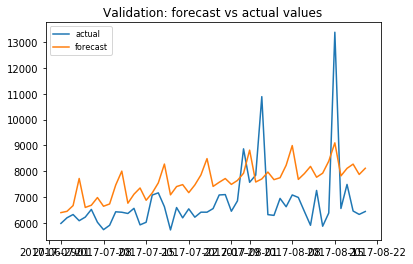

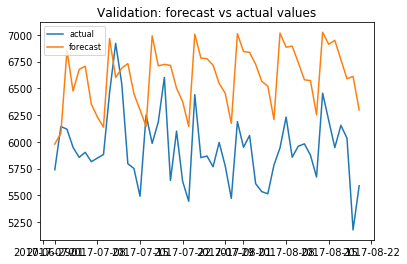

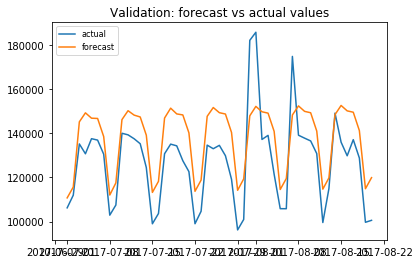

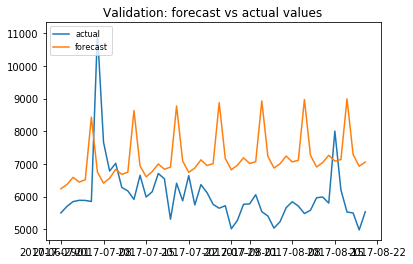

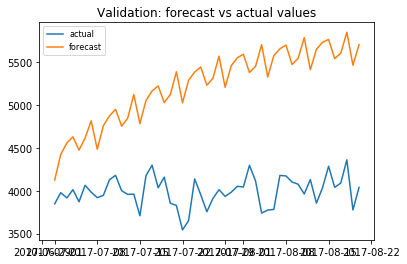

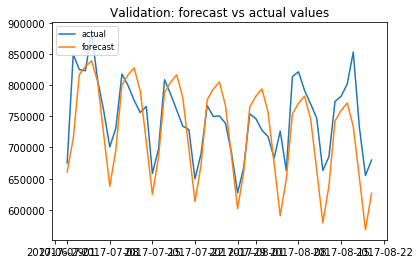

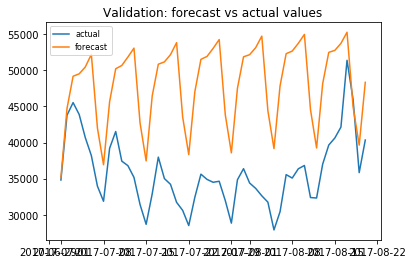

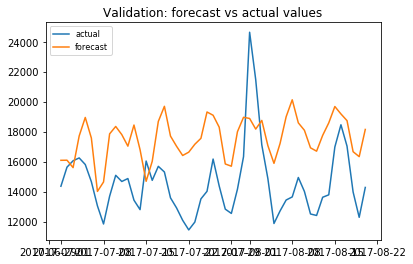

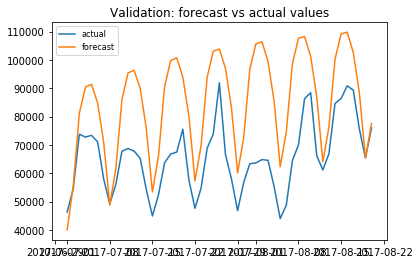

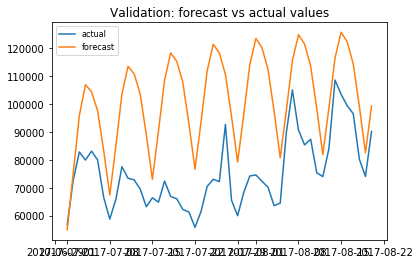

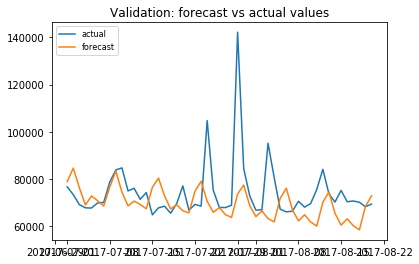

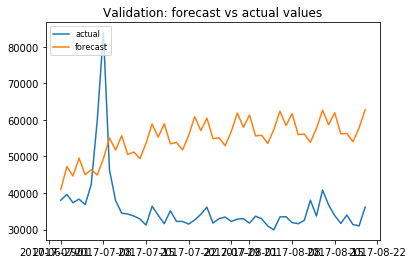

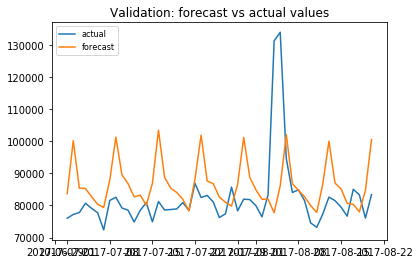

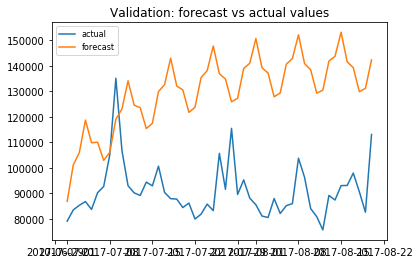

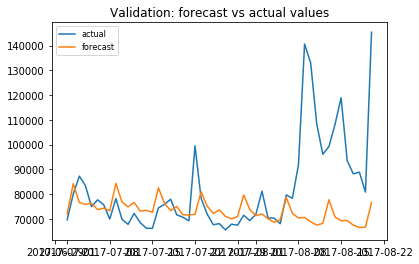

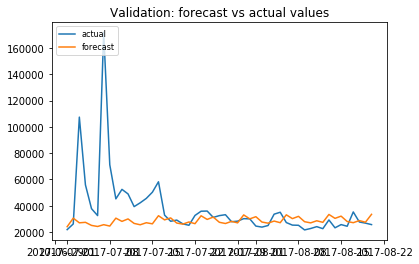

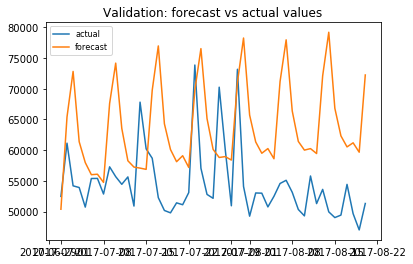

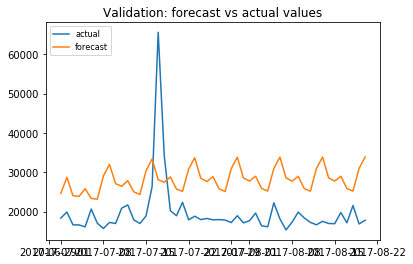

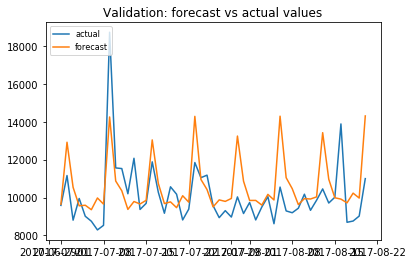

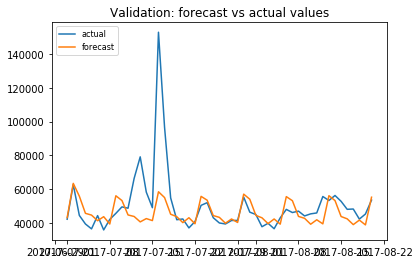

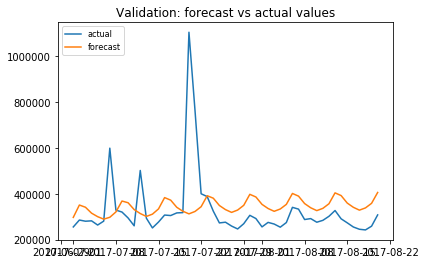

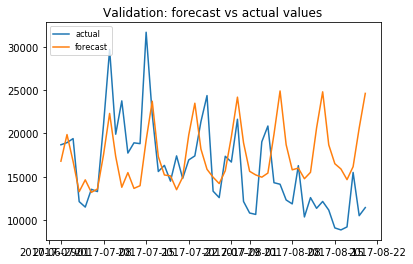

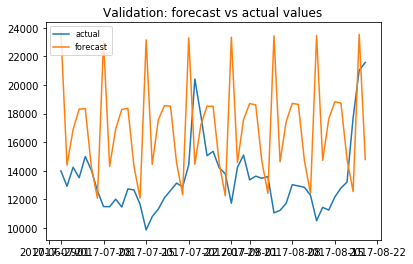

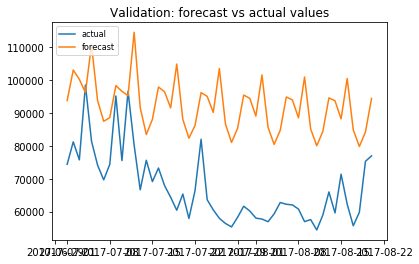

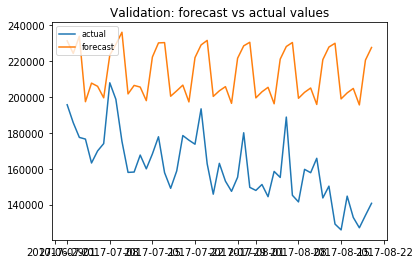

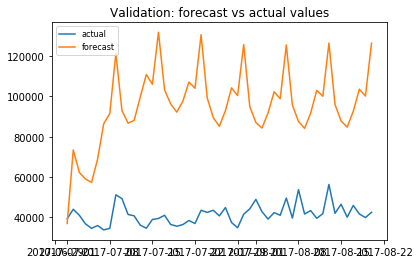

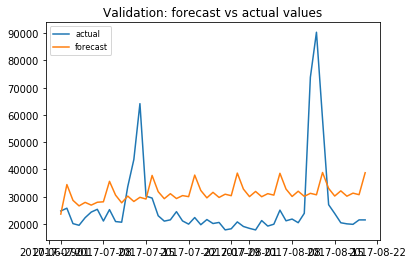

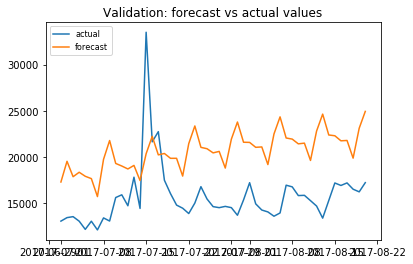

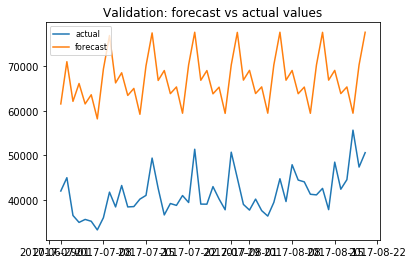

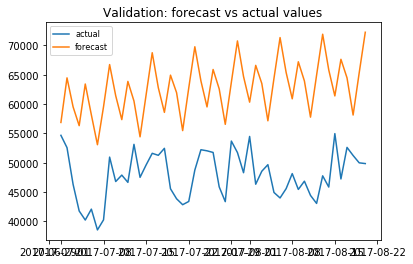

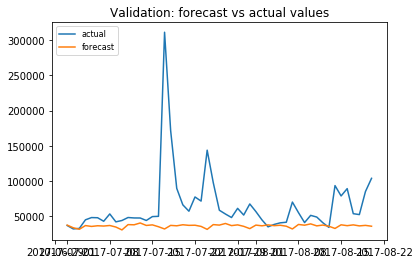

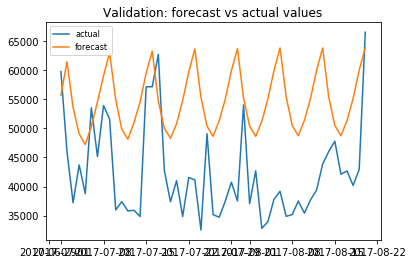

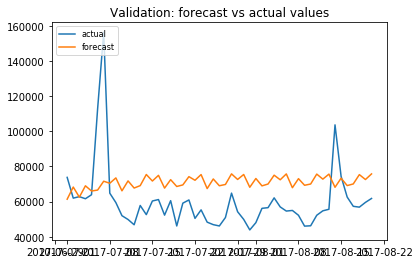

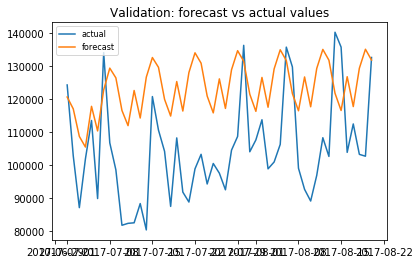

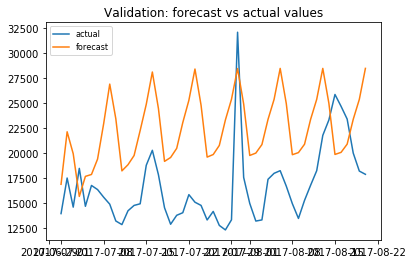

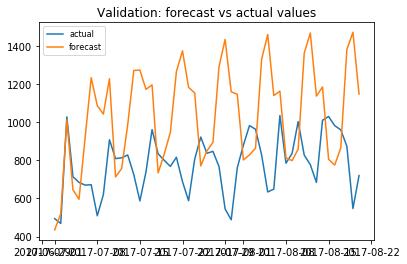

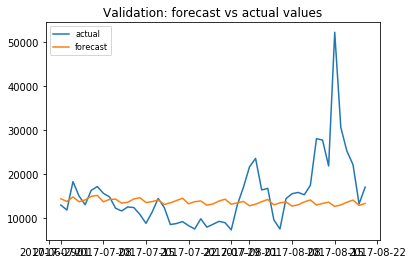

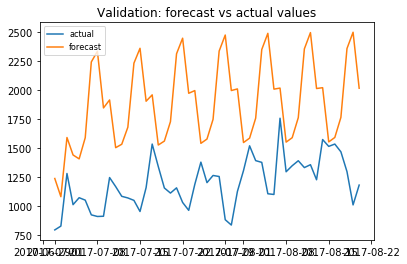

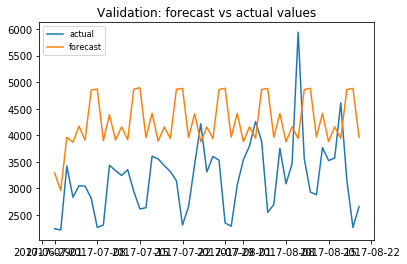

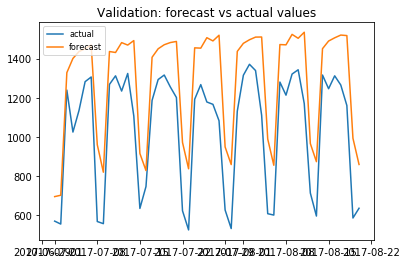

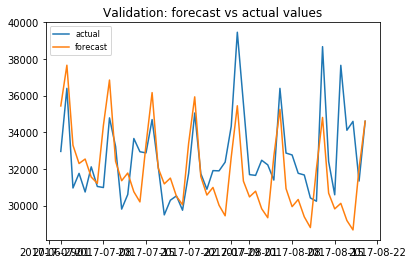

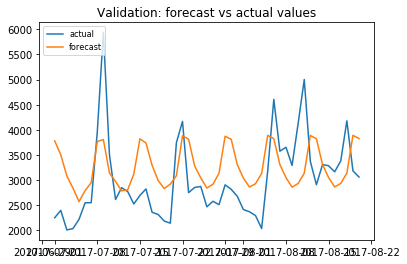

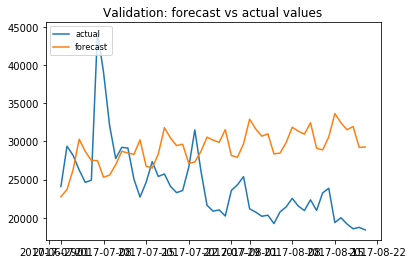

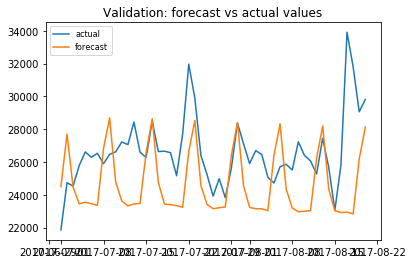

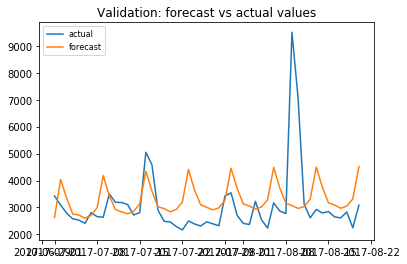

In [2]:
# arima 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

def embedding(data, p):
    data_shifted = data.copy()
    for lag in range(-p+1, 2):
        data_shifted['y_t' + '{0:+}'.format(lag)] = data_shifted['y'].shift(-lag, freq='D')
    data_shifted = data_shifted.dropna(how='any')
    y = data_shifted['y_t+1'].to_numpy()
    X = data_shifted[['y_t' + '{0:+}'.format(lag) for lag in range(-p+1, 1)]].to_numpy()
    return (X,y, data_shifted)

def smape(y_true, y_pred):
    denominator = (y_true + np.abs(y_pred)) / 200.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff)

def keyvalue(df):
    df["horizon"] = range(1, df.shape[0]+1)
    res = pd.melt(df, id_vars = ["horizon"])
    res = res.rename(columns={"variable": "series"})
    res["Id"] = res.apply(lambda row: "s" + str(row["series"].split("-")[1]) + "h"+ str(row["horizon"]), axis=1)
    res = res.drop(['series', 'horizon'], axis=1)
    res = res[["Id", "value"]]
    res = res.rename(columns={"value": "forecasts"})
    return res

def ACF(df):
    fig,ax = plot.subplots()
    plot_acf(df, lags=20, alpha=0.05)
    plt.show()
    print(acf(df))
    
def remove_outliers(series):
    med = np.median(series)
    q25, q75 = np.percentile(series, 25), np.percentile(series, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    upper = q75 + cut_off
    outliers = series > upper
    series[outliers] = np.nan
    series.fillna(med, inplace=True)
    return series

def plotResults(train, test, fc, series):
    fig,ax = plt.subplots()
#     plt.plot(train, label='training')
    plt.plot(test, label="actual")
    plt.plot(fc, label="forecast")
    plt.title("Validation: forecast vs actual values")
    plt.legend(loc="upper left", fontsize=8)
    plt.savefig("./" + series + ".pdf")
    
def checkStationarity(df, d):
    if adfuller(df)[1] > 0.05:
        d+=1
        checkStationarity(df.diff().dropna(), d)
    return d

warnings.simplefilter('ignore')

data = pd.read_csv("./train.csv", index_col = "Day")


data.index = pd.to_datetime(data.index, format = "%Y-%m-%d")
data = data.asfreq('d')

interval_train = pd.date_range(start = '2015-07-01', end = '2017-06-30')
interval_valid  = pd.date_range(start = '2017-07-1',  end = '2017-08-20')

interval_test  = pd.date_range(start = '2017-08-21',  end = '2017-09-10')
HORIZON = len(interval_test)


data_train = data.loc[interval_train]
data_valid = data.loc[interval_valid]

forecasts_arima = pd.DataFrame(index = interval_test)
totalError = 0

for iseries in data_train.columns:    
    print(iseries)
    scaler = MinMaxScaler()
    df = data_train[iseries]
    
#     df = remove_outliers(df)
#     ACF(df)

#     values = df.values
#     values = values.reshape((len(values), 1))
#     normalized = scaler.fit_transform(values)
#     normalized = [val[0] for val in normalized]
#     df = pd.Series(normalized, index=df.index)
    
    d = checkStationarity(df, 0)
    
    validation = pd.DataFrame(index = interval_valid)
    minError = float("inf")
    parametersSMAPE = [0,0,0,0]
    maxParams = [5,5,3,3]

    for i in range(0,maxParams[0]):
        for j in range(0,maxParams[1]):
            for k in range(0,maxParams[2]):
                for l in range(0,maxParams[3]):
                    try:
                        model = SARIMAX(df, order=(i,d,j), seasonal_order=(k,1,l,7))
                        results = model.fit()
                        f_arima = results.predict(start = "2017-07-1", end="2017-08-20")
                        validation[iseries] = f_arima
                        error = smape(data_valid[iseries].reset_index()[iseries], validation.reset_index()[iseries])
                        print(i,j,k,l)
                        print(error, minError)
                        if error < minError:
                            minError=error
                            parametersSMAPE=[i,j,k,l]
                    except: pass
    print(parametersSMAPE)
    plotResults(df, data_valid[iseries], f_arima, iseries)
    
    model = SARIMAX(df, order=(parametersSMAPE[0],d,parametersSMAPE[1]), seasonal_order=(parametersSMAPE[2],1,parametersSMAPE[3],7))
    fittedModel = model.fit()
    f_arima = fittedModel.predict(start = "2017-08-21", end="2017-09-10")
#     inversed = scaler.inverse_transform(np.array(f_arima.reset_index()[0]).reshape(-1, 1))
#     inversed = [val[0] for val in inversed]
#     forecasts_arima[iseries] = inversed
    forecasts_arima[iseries] = f_arima
    
totalError /= len(data_train.columns)
print(totalError)

pred_arima = keyvalue(forecasts_arima)
pred_arima.to_csv("submission_SarimaScaled.csv", index=False)
print(pred_arima)